# Example 1 | Sklearn

## 1. Data load

In [1]:
import pandas as pd

train = pd.read_csv('/HDD/kyohoon/kaggle/quora/train.csv')

In [2]:
train.head()

qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

## 2. EDA

In [3]:
train['length'] = train['question_text'].map(lambda x: len(x))

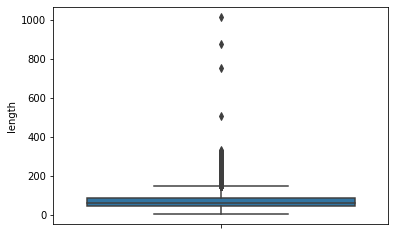

In [4]:
import seaborn as sns
%matplotlib inline

sns.boxplot(y = 'length', data = train)

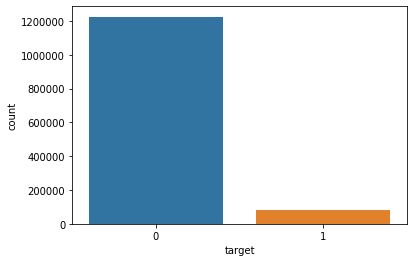

In [5]:
sns.countplot(x = 'target', data = train)

## 3. Train & Validation data split

In [6]:
train_text = train['question_text'].map(lambda x: x.lower())[:5000]
train_label = train['target'][:5000]

test_text = train['question_text'].map(lambda x: x.lower())[6000:7000]
test_label = train['target'][6000:7000]

## 4. Count Vector

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)

In [8]:
vectorizer.fit(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
train_x = vectorizer.transform(train_text)

## 5. Model (Naive Bayes)

In [10]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(train_x, train_label)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## 6. Prediction

In [11]:
test_x = vectorizer.transform(test_text)
prediction = model.predict(test_x)

In [12]:
print('{}% accuracy'.format(sum(prediction == test_label) / len(test_label) * 100))

94.0% accuracy
